  0%|          | 0/2748 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

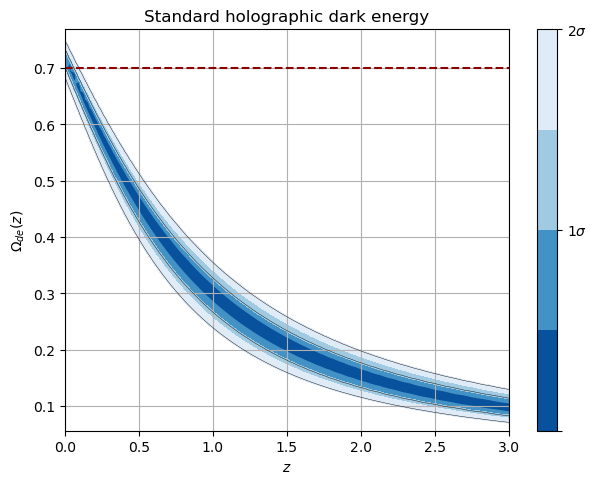

In [7]:
''' 
In this Notebook, we use the fgivenx package for plotting posteriors of functions, using our chains for each 
holographic model. 
For more information about  this package, visit: https://github.com/handley-lab/fgivenx

'''


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from fgivenx import plot_contours, samples_from_getdist_chains

# We stard with the standar holographic dark energy model 
# In this case we just plot the EoS and H(z) for all models.


file_root = '/home/alfonsozapata/SimpleMC/simplemc/chains/HDE/'
file_root += 'HDE_phy_SN+HD+BBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'h', 'c'], file_root)

def HDE(z, theta):
    samples = theta
    Om0 = theta[0]
    H0 = 100 * theta[1]
    c_value = theta[2]
    Ode0 = 1 - Om0
    #print(H0)
    z_rs = np.linspace(0, 3, 100)

    def model_hde(Omega, z):
        dOmega = (Omega * (Omega - 1) / (z + 1)) * ((2 * (np.sqrt(Omega)) / c_value) + 1)
        return dOmega

    sol_de = np.reshape(odeint(model_hde, Ode0, z_rs),len(z_rs))
    #plt.plot(z_rs, sol_de)  
    Om_de = interp1d(z_rs, sol_de, kind='cubic')
    
    def H_z(z):
        H = H0*((Om0*(1+z)**3)/(1-Om_de(z)))**0.5
        return H 
    
    #print(H_z(z))
    def w_eos(z):
        w =  -1 / 3 - (2*np.sqrt(Om_de(z))) / (3*c_value)
        return w 
    def q_z(z):
        q = 1/2 + (3/2)*w_eos(z)*Om_de(z)
        return q
    #plt.plot(z_rs,w_eos(z_rs))
    #return w_eos(z)
    return Om_de(z)

z = np.linspace(0.0000, 3, 100)
cbar1 = plot_contours(HDE, z, samples, weights=weights, contour_line_levels=[1, 2],colors=plt.cm.Blues_r)
cbar1 = plt.colorbar(cbar1,ticks=[0,1,2])
cbar1.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.full(100, 0.7)
plt.plot(z, lcdm,linestyle = '--',color='darkred')
plt.xscale('linear')
plt.xlim(0.0, 3.0)
#plt.ylabel(r'$\omega(z)$')
plt.ylabel(r'$\Omega_{de}(z)$')
#plt.ylabel(r'$q(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.title('Standard holographic dark energy')
plt.grid()
plt.show()


  0%|          | 0/1094 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

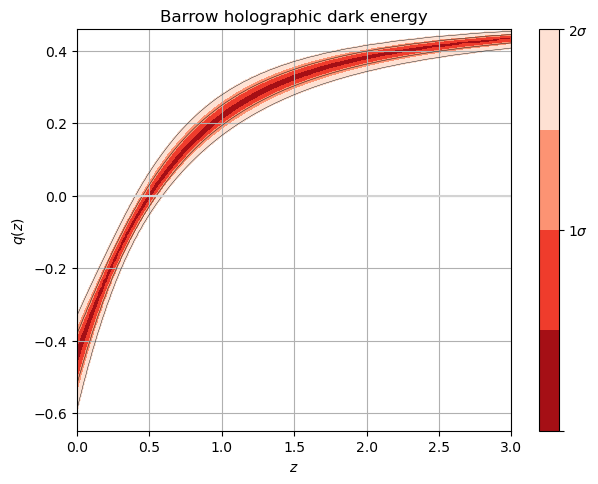

In [73]:
# Barrow model 

file_rootb = '/home/alfonsozapata/SimpleMC/simplemc/chains/Barrow/3002test/'
file_rootb += 'BHDE_phy_SN+HD+BBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'h','c','b'], file_rootb)

def BHDE(z, theta):
    samplesb = theta
    Om0 = theta[0]
    H0 = 100*theta[1]
    c_value = theta[2]
    b_value = theta[3]
    Ode0 = 1 - Om0
    #print(b_value)
    z_rs = np.linspace(0, 3, 100)

    def model_bhde(Omega, z):
        x = np.log(1./(1+z))

        exp1 = 1/(b_value-2)
        exp2 = b_value/(2-b_value)
        exp3 = b_value/(2*(b_value-2))     
        exp4 = 1/(2-b_value)
        exp5 = 3*b_value/(2*(b_value-2))

        Q = (2-b_value)*((c_value**2)**exp1 )*((H0*np.sqrt(Om0))**exp2)

        
        factor1 = - (Omega*(1 - Omega))/(1+z) 
        term1 = b_value + 1 
        term2 = Q*((1-Omega)**exp3)*(Omega**exp4)*np.exp(exp5*x)

        dOmega = factor1*(term1 + term2)
        


    
        return dOmega


    sol_de = np.reshape(odeint(model_bhde, Ode0, z_rs),len(z_rs))
    #plt.plot(z_rs, sol_de)  
    Om_de = interp1d(z_rs, sol_de, kind='cubic')
    
    def H_z(z):
        H = H0*((Om0*(1+z)**3)/(1-Om_de(z)))**0.5
        return H 
    
    #print(H_z(z))
    def w_eos(z):
        exponent1= 1/(2-b_value)
        exponent2 = b_value/(2*(b_value-2))
        exponent3 = 3*b_value/(2*(2-b_value))
        exponent4 = (b_value)/(2-b_value) 
        exponent5 = 1/(b_value-2)
        
        x = np.log(1./(1+z))
        Q =(2-b_value)*((c_value*2)**exponent5)*((H0*np.sqrt(Om0))**exponent4)


        w = -(1+b_value)/3 - (Q/3)*(Om_de(z)**exponent1)*((1-Om_de(z))**exponent2)*np.exp(exponent3*x)
        
        return w 
    
    def q_z(z):
        q = 1/2 + (3/2)*w_eos(z)*Om_de(z)
        return q 
    #plt.plot(z_rs,w_eos(z_rs))
    #return H_z(z)
    #return w_eos(z)
    return q_z(z)

z = np.linspace(0.0000, 3, 100)
cbar = plot_contours(BHDE, z, samples, weights=weights, contour_line_levels=[1, 2])
#cbar = plot_contours(BHDE, z, samples, weights=weights, contour_line_levels=[1, 2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.full(100, 0.0)
#plt.plot(z, lcdm,linestyle = '--',color='darkred')
#plt.plot(z, lcdm,linestyle='--',color='darkslateblue')
plt.plot(z, lcdm,color='lightgrey')
plt.xscale('linear')
plt.xlim(0.0, 3.0)
#plt.ylim(-1.3,-0.4)
#plt.ylabel(r'$\omega(z)$')
plt.ylabel(r'$q(z)$')
#plt.ylabel(r'$\Omega_{de}(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.title('Barrow holographic dark energy')
plt.grid()
plt.show()



  0%|          | 0/828 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

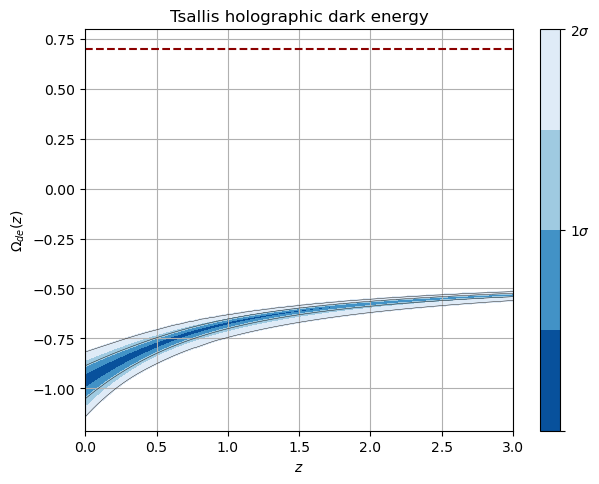

In [19]:
# Tsallis model 

file_roott = '/home/alfonsozapata/SimpleMC/simplemc/chains/Tsallis/250test4/'
file_roott += 'THDE_phy_SN+HD+BBAO_nested_multi'

samplest, weightst = samples_from_getdist_chains(['Om', 'h','c','s'], file_roott)

def THDE(z, theta):
    samplest = theta
    Om0 = theta[0]
    H0 = 100*theta[1]
    c_value = theta[2]
    s_value = theta[3]
    Ode0 = 1 - Om0
    #print(b_value)
    z_rs = np.linspace(0, 3, 100)

    def model_thde(Omega, z):
        exponent1 = (1-s_value)/(2*(2-s_value))
        exponent2 = 1/(2*(2-s_value))
        exponent3 = 3*(1-s_value)/(2*(2-s_value))
        exponent4 = (1-s_value)/(s_value-2) 
        exponent5 = 1/(2*(s_value-2))

        x = np.log(1./(1+z))
        Q =2*(2-s_value)*((c_value*2)**exponent5)*((H0*np.sqrt(Om0))**exponent4)
        # Compute common terms
            
        
        
        factor1 = - (Omega*(1 - Omega))/(1+z)
        term1 = 2*s_value-1 
        term2 = Q*((1-Omega)**exponent1)*(Omega**exponent2)*np.exp(exponent3*x)

        dOmega = factor1*(term1 + term2)

        return dOmega
      


    sol_de = np.reshape(odeint(model_thde, Ode0, z_rs),len(z_rs))
    #plt.plot(z_rs, sol_de)  
    Om_de = interp1d(z_rs, sol_de, kind='cubic')
    
    def H_z(z):
        H = H0*((Om0*(1+z)**3)/(1-Om_de(z)))**0.5
        return H 
    
    #print(H_z(z))
    def w_eos(z):
        exponent1= 1/(2*(2-s_value))
        exponent2 = (s_value-1)/(2*(s_value-2))
        exponent3 = 3*(1-s_value)/(2*(s_value-2))
        exponent4 = (1-s_value)/(s_value-2) 
        exponent5 = 1/(2*(s_value-2))
        
        x = np.log(1./(1+z))
        Q =2*(2-s_value)*((c_value*2)**exponent5)*((H0*np.sqrt(Om0))**exponent4)


        w = (1-2*s_value)/3 - (Q/3)*(Om_de(z)**exponent1)*((1-Om_de(z))**exponent2)*np.exp(exponent3*x)
        return w 
    
    def q_z(z):
        q = 1/2 + (3/2)*w_eos(z)*Om_de(z)
        return q 


    #plt.plot(z_rs,w_eos(z_rs))
    return w_eos(z)
    #return q_z(z)
    #return Om_de(z)

z = np.linspace(0.0000, 3, 100)
#cbar = plot_contours(THDE, z, samplest, weights=weightst, contour_line_levels=[1, 2],colors=plt.cm.Greens_r)
#cbar = plot_contours(THDE, z, samplest, weights=weightst, contour_line_levels=[1, 2])
cbar = plot_contours(THDE, z, samplest, weights=weightst, contour_line_levels=[1, 2],colors=plt.cm.Blues_r)
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.full(100, 0.7)
plt.plot(z, lcdm,linestyle = '--',color='darkred')
#plt.plot(z, lcdm,linestyle='--',color='darkslateblue')
#plt.plot(z, lcdm,color='lightgrey')
plt.xscale('linear')
plt.xlim(0.0, 3.0)
#plt.ylim(-1.3,-0.4)
#plt.ylabel(r'$\omega(z)$')
#plt.ylabel(r'$q(z)$')
plt.ylabel(r'$\Omega_{de}(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.title('Tsallis holographic dark energy')
plt.grid()
plt.show()


  0%|          | 0/1328 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

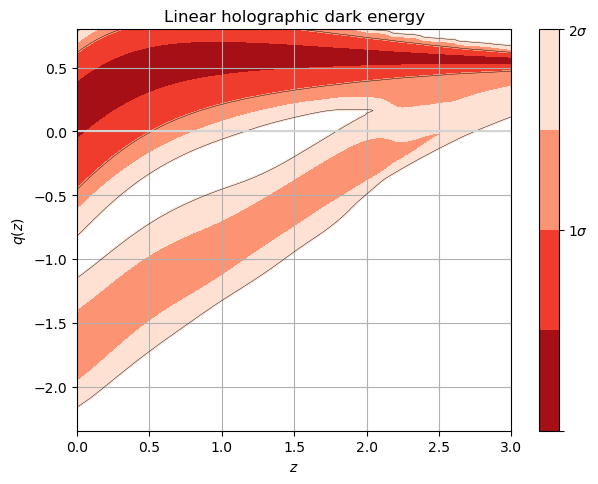

In [17]:
'''
Linear exponent 
f(z) = a + bz
'''

file_rootl = '/home/alfonsozapata/SimpleMC/simplemc/chains/Linear/BLHDE/350test2/'
file_rootl += 'LHDE_phy_SN+HD+BBAO_nested_multi'

samplesl, weightsl = samples_from_getdist_chains(['Om', 'h','c','b','a'], file_rootl)

def LHDE(z, theta):
    samplesl = theta
    Om0 = theta[0]
    H0 = 100*theta[1]
    c_value = theta[2]
    b_value = theta[3]
    a_value = theta[4]
    Ode0 = 1 - Om0
    #print(b_value)
    z_rs = np.linspace(0, 3, 100)

    def model_lhde(Omega,z):
        x = np.log(1./(1+z))
        C = 3*(c_value**2)
        Q = (C*np.exp(3*x))/(3*(H0**2)*Om0)
        # Compute common terms
        term1 = - (Omega* (1 - Omega))/(1+z)
        sqrt_Omega_DE = np.sqrt(Omega)
        term2_base = (C / 3 )**(-0.5)
        fraction_Q_Omega = Q * (1 - Omega) / Omega
    
    # Exponents
        exponent1 = (a_value + b_value*z) / (2 * (a_value + b_value*z - 2))
        exponent2 = (-b_value * (1 + z)) / (a_value + b_value*z - 2)
    
    # Calculate individual components of the right-hand side
        rhs1 = sqrt_Omega_DE * term2_base * ((fraction_Q_Omega)**exponent1)*(2 - a_value - b_value* z)
        rhs2 = np.log(fraction_Q_Omega**exponent2)
        rhs3 = a_value + b_value*z + 1
    
    # Combine all terms to calculate dOmega_DE_dz
        rhs = rhs1 + rhs2 + rhs3
        dOmega_DE_dz = term1 * rhs
    
        return dOmega_DE_dz


    sol_del = np.reshape(odeint(model_lhde, Ode0, z_rs),len(z_rs))
    #plt.plot(z_rs, sol_de)  
    Om_de = interp1d(z_rs, sol_del, kind='cubic')
    
    def H_z(z):
        H = H0*((Om0*(1+z)**3)/(1-Om_de(z)))**0.5
        return H 
    
    
    def w_eos(z):
        x = np.log(1. / (1 + z))
        Q = ((c_value ** 2) * np.exp(3 * x)) / ((H0 ** 2) * Om0)
                    
        exponent1 = (a_value + b_value* z) / (2 * (a_value + b_value* z - 2))
        exponent2 = 1. / (2 - a_value - b_value* z)

        w_DE = -(a_value + b_value * z + 1) / 3 + ((a_value + b_value* z - 2) * np.sqrt(Om_de(z)) / 3) * ((c_value ** 2) ** (-0.5)) * ((Q * (1 - Om_de(z)) / Om_de(z)) ** exponent1) + ((1 + z)*b_value/ 3) * np.log((Q * (1 - Om_de(z)) / Om_de(z)) ** exponent2)
        return w_DE
                    
    
    def q_z(z):
        q = 1/2 + (3/2)*w_eos(z)*Om_de(z)
        return q 
    
    
    #return w_eos(z)
    #return Om_de(z)
    return q_z(z)

z = np.linspace(0.0000, 3, 100)
#cbar = plot_contours(LHDE, z, samplesl, weights=weightsl, contour_line_levels=[1, 2],colors=plt.cm.Blues_r)
cbar = plot_contours(LHDE, z, samplesl, weights=weightsl, contour_line_levels=[1, 2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.full(100, 0.0)
#plt.plot(z, lcdm,linestyle='--',color='darkslateblue')
plt.plot(z, lcdm,color='lightgrey')
plt.xscale('linear')
plt.xlim(0.0, 3.0)
#plt.ylim(-5,1.0)
#plt.ylabel(r'$\omega(z)$')
plt.ylabel(r'$q(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.title('Linear holographic dark energy')
plt.grid()
plt.show()



In [32]:
range(len(samplesl[3]))

range(0, 5)

  0%|          | 0/1256 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

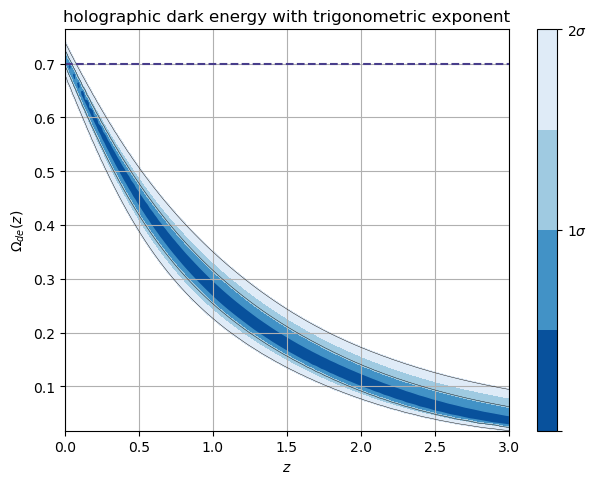

In [9]:
'''
Trigonometric exponent 
f(z) = a + bsin(z)
'''

file_roots = '/home/alfonsozapata/SimpleMC/simplemc/chains/SHDE/350test2/'
file_roots += 'SHDE_phy_SN+HD+BBAO_nested_multi'

sampless, weightss = samples_from_getdist_chains(['Om', 'h','c','k','r'], file_roots)

def SHDE(z, theta):
    samplesl = theta
    Om0 = theta[0]
    H0 = 100*theta[1]
    c_value = theta[2]
    k_value = theta[3]
    r_value = theta[4]
    Ode0 = 1 - Om0
    #print(b_value)
    z_rs = np.linspace(0, 3, 100)

    def model_shde(Omega, z):
        x = np.log(1./(1+z))
        C = 3*(c_value**2)
        Q = (C*np.exp(3*x))/(3*(H0**2)*Om0)
        # Compute common terms
        term1 = - (Omega* (1 - Omega))/(1+z)
        sqrt_Omega_DE = np.sqrt(Omega)
        term2_base = (C / 3 )**(-0.5)
        fraction_Q_Omega = Q * (1 - Omega) / Omega
    
    # Exponents
        exponent1 = (k_value + r_value * np.sin(z)) / (2 * (k_value + r_value*np.sin(z) - 2))
        exponent2 = (-(1 + z) *r_value * np.cos(z)) / (k_value +r_value *np.sin(z) - 2)
    
    # Calculate individual components of the right-hand side
        rhs1 = sqrt_Omega_DE * term2_base * (fraction_Q_Omega)**exponent1 * (2 - k_value - r_value*np.sin(z))
        rhs2 = np.log(fraction_Q_Omega**exponent2)
        rhs3 = k_value+ r_value*np.sin(z) + 1
    
    # Combine all terms to calculate Omega_DE'
        rhs = rhs1 + rhs2 + rhs3
        Omega_DE_prime = term1 * rhs
    
        return Omega_DE_prime


    sol_des = np.reshape(odeint(model_shde, Ode0, z_rs),len(z_rs))
    #plt.plot(z_rs, sol_de)  
    Om_de = interp1d(z_rs, sol_des, kind='cubic')
    
    def H_z(z):
        H = H0*((Om0*(1+z)**3)/(1-Om_de(z)))**0.5
        return H 
    
    #print(H_z(z))
    def w_eos(z):
        x = np.log(1./(1+z))
        C = 3*(c_value**2)
        Q = (C*np.exp(3*x))/(3*(H0**2)*Om0)
        sin_z = np.sin(z)
        cos_z = np.cos(z)
        sqrt_Omega_DE = np.sqrt(Om_de(z))
        term_base = (C / 3)**(-0.5)
        fraction_Q_Omega = Q*(1 - Om_de(z))/Om_de(z)

    # Components of the equation
        term1 = - (k_value + r_value*sin_z + 1) / 3
        exponent1 = (k_value + r_value*sin_z) / (2 * (k_value + r_value*sin_z - 2))
        term2 = ((k_value + r_value*sin_z- 2) * sqrt_Omega_DE / 3) * term_base * (fraction_Q_Omega**exponent1)
        exponent2 = 1 / (2 - k_value -r_value*sin_z)
        term3 = ((1 + z) * r_value* cos_z / 3) * np.log(fraction_Q_Omega**exponent2)

    # Calculate w_DE
        w_DE = term1 + term2 + term3
    
        return w_DE
    def q_z(z):
        q = 1/2 + (3/2)*w_eos(z)*Om_de(z)
        return q
    
    
    #return q_z(z)
    #return w_eos(z)
    return Om_de(z) 

z = np.linspace(0.0000, 3, 100)
cbar = plot_contours(SHDE, z, sampless, weights=weightss, contour_line_levels=[1, 2],colors=plt.cm.Blues_r)
#cbar = plot_contours(SHDE, z, sampless, weights=weightss, contour_line_levels=[1, 2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])


lcdm = np.full(100, 0.7)
plt.plot(z, lcdm,linestyle='--',color='darkslateblue')
#plt.plot(z, lcdm,color='lightgrey')
plt.xscale('linear')
plt.xlim(0.0, 3.0)
#plt.ylim(-3,0)
#plt.ylabel(r'$\omega(z)$')
plt.ylabel(r'$\Omega_{de}(z)$')
plt.xlabel(r'$z$')
plt.tight_layout()
plt.title('holographic dark energy with trigonometric exponent')
plt.grid()
plt.show()

